In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
data = pd.read_csv("/Users/Sri/Documents/openFDA/Data/Device classification end point/Ophthalmic_classified_devices.csv")


In [2]:
data.head()

,Unnamed: 0,definition,device_class,device_name,gmp_exempt_flag,implant_flag,life_sustain_support_flag,medical_specialty,medical_specialty_description,product_code,regulation_number,review_code,review_panel,submission_type_id,third_party_flag,unclassified_reason
0,0,NaN,1,"Lens, Maddox",Y,N,N,OP,Ophthalmic,HKR,886.140,NaN,OP,4,N,NaN
1,1,NaN,2,"Calibrator, Tonometer",N,N,N,OP,Ophthalmic,HLA,886.193,NaN,OP,1,P,NaN
2,2,AC-powered or non-powered device intended to s...,1,"Stand, Instrument, Ophthalmic, Battery Powered",Y,N,N,OP,Ophthalmic,NOI,886.186,NaN,OP,4,N,NaN
3,3,NaN,2,"Ophthalmoscope, Battery-Powered",N,N,N,OP,Ophthalmic,HLJ,886.157,M,OP,4,Y,NaN
4,4,NaN,1,Cystotome,N,N,N,OP,Ophthalmic,HNY,886.435,NaN,OP,4,N,NaN


In [3]:
len(data)

276

Number of devices classified as ophthalmic devices: 276

## Number of devices by device_class

All the devices are categorized into 3 classes based on the risk.   
Class 1 devices: Low or moderate risk devices  
Class 2 devices: Moderate or High risk devices  
Class 3 devices: High risk devices  
U : Unclassified devices  
N : Not classified  
F : HDE  

In [4]:
df = data[["device_class", "Unnamed: 0"]]

In [5]:
df = df.groupby("device_class").count().reset_index()
df.rename(columns={'Unnamed: 0': "count"}, inplace=True)

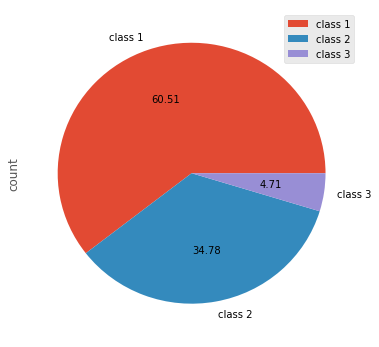

In [6]:
df.plot.pie(y="count",labels=['class 1', 'class 2', 'class 3'],autopct='%.2f', figsize=(6,6))


## Number of devices by implant flag

In [7]:
df1 = data[["Unnamed: 0", "implant_flag"]]
df1 = df1.groupby("implant_flag").count().reset_index()
df1.rename(columns={"Unnamed: 0": "count"}, inplace=True)
df1.head()

,implant_flag,count
0,N,258
1,Y,18


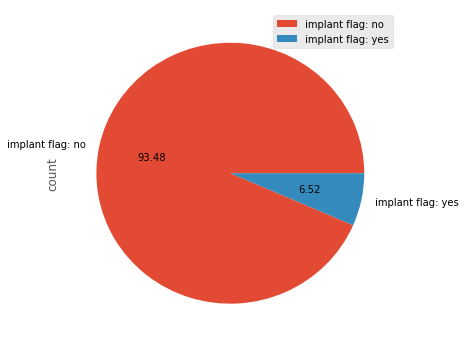

In [8]:
df1.plot.pie(y="count", labels=["implant flag: no", "implant flag: yes"], autopct='%.2f', figsize=(6,6))

## Number of devices by submission Type ID

In [9]:
submission_type_dict = {1:"510(K)", 2:"PMA", 3:"Contact ODE", 4:"510(K) Exempt"}

In [10]:
df2 = data[["Unnamed: 0", "submission_type_id"]]
df2 = df2.groupby("submission_type_id").count().reset_index()
df2.rename(columns={"Unnamed: 0": "count"}, inplace=True)
df2

,submission_type_id,count
0,1,87
1,2,13
2,4,175
3,7,1


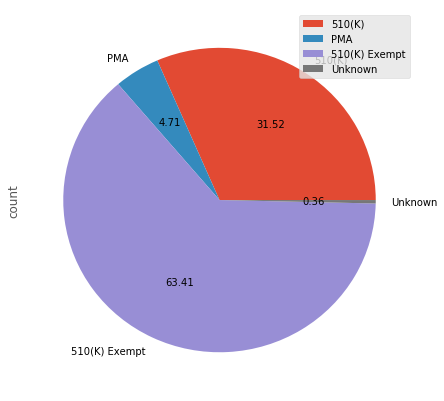

In [11]:
df2.plot.pie(y="count", autopct='%0.2f', figsize=(7,7), labels = ["510(K)", "PMA", "510(K) Exempt", "Unknown"])

## devices with implant flag and class classification

In [12]:
df3 = data[["Unnamed: 0", "device_class", "implant_flag"]]

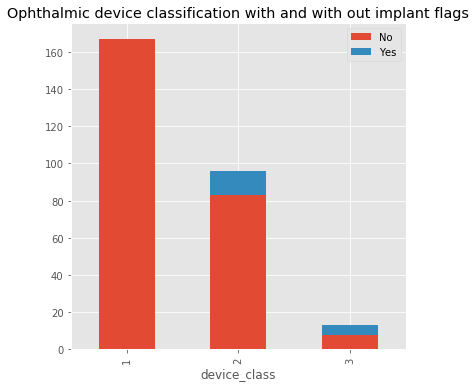

In [13]:
fig, ax = plt.subplots()
devices_by_class_implant_flag = df3.groupby(["device_class", "implant_flag"]).size().unstack()
devices_by_class_implant_flag.plot(kind='bar', stacked=True, figsize=(6,6), title="Ophthalmic device classification with and with out implant flags", ax=ax)
ax.legend(["No", "Yes"])

## Devices by risk classification and submission type

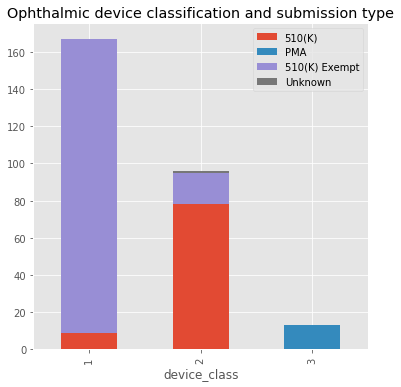

In [20]:
df4 = data[["Unnamed: 0", "device_class", "submission_type_id"]]
fig, ax = plt.subplots()
devices_by_class_submission_type = df4.groupby(["device_class", "submission_type_id"]).size().unstack()
devices_by_class_submission_type.plot(kind='bar', stacked=True, figsize=(6,6), title="Ophthalmic device classification and submission type", ax=ax)
ax.legend(["510(K)", "PMA", "510(K) Exempt", "Unknown"])
